# Virtual Mouse

#### Rancangan akhir *virtual mouse* menggunakan model **Custom Convolutional Neural Network**

#### Importing Library

In [114]:
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random

#### Data Preparation

In [115]:
datasets_dir = './datasets'
datasets_train_dir = os.path.join(datasets_dir, 'data_training')

In [116]:
categories = ['control_volume', 'drag_mouse', 'mouse_click', 'moving_cursor', 'right_click']

##### change image to array

In [117]:
for category in categories:
    path = os.path.join(datasets_train_dir, category)
    for img in os.listdir(path):
        image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        

In [118]:
print(image_array.shape)

(300, 300)


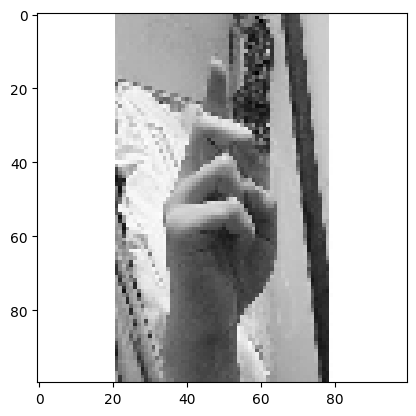

In [119]:
img_size = 100

img_array_resized = cv2.resize(image_array, (img_size, img_size))
plt.imshow(img_array_resized, cmap='gray')
plt.show()

(-0.5, 99.5, 99.5, -0.5)

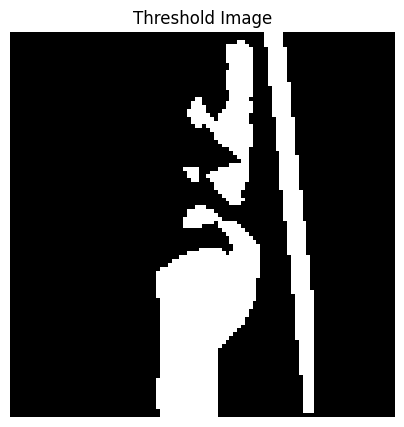

In [120]:
_, thresholded_image = cv2.threshold(img_array_resized, 100, 200, cv2.THRESH_BINARY_INV)
plt.figure(figsize=(5,5))
blurred_image = cv2.medianBlur(thresholded_image, 5)
plt.imshow(blurred_image, cmap='gray')
plt.title("Threshold Image")
plt.axis('off')

##### data labeling

In [121]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datasets_train_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array_resized = cv2.resize(image_array, (img_size, img_size))
                _, thresholded_image = cv2.threshold(img_array_resized, 150, 200, cv2.THRESH_BINARY_INV)
                blurred_image = cv2.medianBlur(thresholded_image, 5)
                training_data.append([blurred_image,class_num])
            except Exception as e:
                pass

create_training_data()

In [122]:
print(len(training_data))

15475


##### shuffle data X for training

In [123]:
import random

random.shuffle(training_data)

In [124]:
for sample in training_data:
    print(sample[1])
    print(sample[0])

2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
4
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
2
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
3
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0
[[0 0 0 ... 0 0 0]
 [0

##### seperate data X and label y

In [125]:
X = []
y = []

In [126]:
for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 1)
X.shape

(15475, 100, 100, 1)

##### normalization X

In [127]:
X = X / 255
print(X)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [128]:
print(X.shape)

(15475, 100, 100, 1)


#### Split data testing and training

In [129]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=30)


In [130]:
print(x_train.shape)
print(y_train)

(12380, 100, 100, 1)
[3, 2, 3, 4, 1, 2, 3, 2, 0, 3, 4, 0, 3, 1, 2, 2, 4, 0, 0, 4, 2, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1, 1, 4, 4, 2, 1, 1, 1, 2, 2, 0, 3, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 4, 4, 0, 3, 2, 3, 0, 4, 4, 2, 3, 4, 2, 1, 3, 0, 2, 2, 3, 4, 1, 0, 2, 3, 3, 2, 4, 2, 0, 1, 4, 1, 1, 2, 1, 3, 2, 4, 0, 4, 4, 1, 4, 2, 1, 0, 1, 4, 4, 3, 1, 2, 4, 1, 4, 2, 2, 0, 4, 0, 4, 2, 3, 0, 0, 3, 1, 0, 4, 0, 2, 3, 1, 1, 0, 4, 4, 0, 3, 0, 2, 3, 1, 0, 0, 4, 1, 3, 0, 1, 0, 2, 4, 2, 2, 1, 4, 3, 4, 1, 2, 3, 3, 1, 1, 3, 2, 1, 2, 2, 1, 4, 2, 3, 2, 1, 0, 4, 1, 3, 2, 3, 2, 0, 4, 3, 2, 4, 0, 0, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 0, 1, 1, 3, 1, 1, 3, 0, 0, 3, 3, 1, 2, 4, 3, 3, 3, 2, 4, 1, 0, 1, 4, 4, 3, 4, 3, 1, 3, 2, 2, 3, 1, 4, 4, 4, 3, 2, 3, 1, 1, 3, 2, 1, 4, 2, 1, 4, 1, 1, 3, 4, 1, 2, 4, 3, 0, 2, 0, 1, 1, 1, 1, 2, 1, 3, 0, 1, 3, 2, 1, 0, 0, 3, 4, 4, 4, 4, 3, 4, 0, 2, 2, 1, 4, 1, 0, 4, 4, 1, 0, 4, 2, 2, 0, 0, 2, 3, 2, 1, 4, 0, 1, 4, 2, 2, 3, 2, 0, 0, 2, 2, 2, 4, 2, 3, 0, 3, 3, 4, 3, 4, 4, 4, 0, 3, 2, 4, 0, 0, 

In [131]:
print(x_test.shape)
print(y_test)

(3095, 100, 100, 1)
[3, 4, 2, 1, 1, 2, 1, 2, 4, 1, 3, 3, 2, 3, 3, 3, 0, 1, 1, 3, 3, 3, 1, 3, 0, 0, 0, 4, 1, 3, 1, 2, 0, 3, 0, 3, 3, 4, 3, 4, 1, 1, 0, 0, 1, 0, 4, 0, 4, 3, 4, 1, 3, 0, 3, 3, 4, 3, 2, 2, 1, 2, 3, 3, 4, 3, 1, 2, 3, 2, 4, 3, 0, 3, 3, 3, 4, 1, 1, 4, 2, 4, 1, 2, 3, 1, 2, 0, 2, 3, 4, 2, 2, 1, 0, 2, 0, 4, 2, 4, 1, 3, 3, 3, 1, 2, 3, 3, 0, 3, 1, 4, 0, 4, 2, 0, 4, 0, 0, 2, 4, 3, 2, 1, 0, 1, 0, 2, 1, 4, 4, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 4, 4, 0, 2, 3, 2, 0, 4, 4, 4, 2, 2, 3, 4, 2, 4, 2, 4, 0, 4, 0, 0, 2, 3, 3, 2, 2, 1, 0, 1, 0, 4, 4, 4, 2, 4, 0, 1, 2, 0, 0, 1, 4, 1, 2, 3, 3, 1, 3, 4, 0, 1, 1, 4, 2, 2, 0, 2, 3, 3, 3, 3, 1, 4, 4, 2, 0, 3, 1, 0, 0, 0, 3, 1, 3, 1, 2, 4, 2, 3, 2, 1, 2, 3, 3, 1, 1, 2, 1, 3, 4, 0, 0, 3, 1, 0, 3, 1, 4, 3, 0, 4, 3, 1, 4, 1, 2, 3, 0, 2, 2, 4, 2, 3, 2, 2, 1, 4, 1, 4, 3, 3, 3, 1, 1, 1, 2, 4, 0, 0, 3, 4, 0, 3, 4, 3, 4, 4, 4, 4, 2, 2, 2, 0, 3, 1, 0, 4, 3, 2, 0, 3, 2, 2, 0, 3, 1, 3, 2, 3, 2, 0, 0, 0, 4, 3, 4, 1, 2, 3, 2, 1, 3, 0, 1, 4, 3, 3, 0, 0, 0, 4, 2, 4, 1

#### Make Custom CNN Model

In [132]:
custom_cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), input_shape = X.shape[1:], activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

custom_cnn.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])



/home/steven/Projects/python/comvis/virtual_mouse/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard

logdir = "logs_final/"
tensorboard_callback = TensorBoard(log_dir=logdir)

#### Train data

In [ ]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Model checkpoint callback - save the best model based on validation loss
model_checkpoint = ModelCheckpoint('best_custom_cnn_model_final.keras', monitor='val_loss', save_best_only=True, verbose=1)

x_train = np.array(x_train)
y_train = np.array(y_train)
custom_cnn.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.1, callbacks=[early_stop, model_checkpoint, tensorboard_callback])

Epoch 1/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - accuracy: 0.4449 - loss: 1.2229
Epoch 1: val_loss improved from inf to 0.08495, saving model to best_custom_cnn_model_final2.keras
349/349 ━━━━━━━━━━━━━━━━━━━━ 73s 200ms/step - accuracy: 0.4455 - loss: 1.2216 - val_accuracy: 0.9742 - val_loss: 0.0850
Epoch 2/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9282 - loss: 0.2162
Epoch 2: val_loss improved from 0.08495 to 0.02551, saving model to best_custom_cnn_model_final2.keras
349/349 ━━━━━━━━━━━━━━━━━━━━ 70s 200ms/step - accuracy: 0.9282 - loss: 0.2161 - val_accuracy: 0.9903 - val_loss: 0.0255
Epoch 3/50
349/349 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - accuracy: 0.9683 - loss: 0.0939
Epoch 3: val_loss improved from 0.02551 to 0.02123, saving model to best_custom_cnn_model_final2.keras
349/349 ━━━━━━━━━━━━━━━━━━━━ 70s 199ms/step - accuracy: 0.9683 - loss: 0.0939 - val_accuracy: 0.9927 - val_loss: 0.0212
Epoch 4/50
348/349 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.973

#### Evaluate Model

In [135]:
x_test = np.array(x_test)
y_test = np.array(y_test)
custom_cnn.evaluate(x_test, y_test)

97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.9998 - loss: 5.8872e-04


[0.0017566370079293847, 0.9990307092666626]

In [136]:
custom_cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 98, 98, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,762,513 (10.54 MB)

 Trainable params: 920,837 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,841,676 (7.03 MB)

In [137]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = custom_cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_classes))

97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       614
           1       1.00      1.00      1.00       595
           2       1.00      1.00      1.00       603
           3       1.00      1.00      1.00       646
           4       1.00      1.00      1.00       637

    accuracy                           1.00      3095
   macro avg       1.00      1.00      1.00      3095
weighted avg       1.00      1.00      1.00      3095

Confusion Matrix 
 [[613   1   0   0   0]
 [  0 595   0   0   0]
 [  0   0 603   0   0]
 [  0   1   0 644   1]
 [  0   0   0   0 637]]


In [138]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(categories[y[index]])

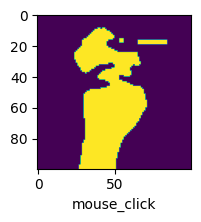

In [139]:
y_pred_classes = np.array(y_pred_classes)
plot_sample(x_test, y_pred_classes, 7)

In [140]:
y_pred_classes[:15]


array([3, 4, 2, 1, 1, 2, 1, 2, 4, 1, 3, 3, 2, 3, 3])

In [141]:
y_test[:15]

array([3, 4, 2, 1, 1, 2, 1, 2, 4, 1, 3, 3, 2, 3, 3])

In [142]:
mvDir = "datasets/data_training/moving_cursor"
print(len(os.listdir(mvDir)))

3095


In [143]:
dmDir = "datasets/data_training/drag_mouse"
print(len(os.listdir(dmDir)))

3095


In [144]:
mcDir = "datasets/data_training/mouse_click"
print(len(os.listdir(mcDir)))

3095


In [145]:
cvDir = "datasets/data_training/control_volume"
print(len(os.listdir(cvDir)))

3095


In [ ]:
rcDir = "datasets/data_training/right_click"
print(len(os.listdir(rcDir)))

3095


: 